# Model - LSTM

In [11]:
%matplotlib inline

## Load the data

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

file = "/workspaces/AML_Assignment-2/AML_Assignment-2/movie(cleaned).csv" 
data = pd.read_csv(file, encoding='utf-8')


In [47]:
pd.set_option("display.max_colwidth", 1000)
data.head(5)

,text,label
0,i grew up b 1965 watching and loving the thunderbirds all my mates at school watched we played thunderbirds before school during lunch and after school we all wanted to be virgil or scott no one wanted to be alan counting down from 5 became an art form i took my children to see the movie hoping they would get a glimpse of what i loved as a child how bitterly disappointing the only high point was the snappy theme tune not that it could compare with the original score of the thunderbirds thankfully early saturday mornings one television channel still plays reruns of the series gerry anderson and his wife created jonatha frakes should hand in his directors chair his version was completely hopeless a waste of film utter rubbish a cgi remake may be acceptable but replacing marionettes with homo sapiens subsp sapiens was a huge error of judgment,0
1,when i put this movie in my dvd player and sat down with a coke and some chips i had some expectations i was hoping that this movie would contain some of the strongpoints of the first movie awsome animation good flowing story excellent voice cast funny comedy and a kickass soundtrack but to my disappointment not any of this is to be found in atlantis milos return had i read some reviews first i might not have been so let down the following paragraph will be directed to those who have seen the first movie and who enjoyed it primarily for the points mentionedwhen the first scene appears your in for a shock if you just picked atlantis milos return from the displaycase at your local videoshop or whatever and had the expectations i had the music feels as a bad imitation of the first movie and the voice cast has been replaced by a not so fitting one with the exception of a few characters like the voice of sweet the actual drawings isnt that bad but the animation in particular is a sad si...,0
2,why do people who do not know what a particular time in the past was like feel the need to try to define that time for others replace woodstock with the civil war and the apollo moonlanding with the titanic sinking and youve got as realistic a flick as this formulaic soap opera populated entirely by lowlife trash is this what kids who were too young to be allowed to go to woodstock and who failed grade school composition do ill show those old meanies ill put out my own movie and prove that you dont have to know nuttin about your topic to still make money yeah we already know that the one thing watching this film did for me was to give me a little insight into underclass thinking the next time i see a slut in a bar who looks like diane lane im running the other way its child abuse to let parents that worthless raise kids its audience abuse to simply stick woodstock and the moonlanding into a flick as if that ipso facto means the film portrays 1969,0
3,even though i have great interest in biblical movies i was bored to death every minute of the movie everything is bad the movie is too long the acting is most of the time a joke and the script is horrible i did not get the point in mixing the story about abraham and noah together so if you value your time and sanity stay away from this horror,0
4,im a die hard dads army fan and nothing will ever change that i got all the tapes dvds and audiobooks and every time i watchlisten to them its brand new the film the film is a re run of certain episodes man and the hour enemy within the gates battle school and numerous others with a different edge introduction of a new general instead of captain square was a brilliant move especially when he wouldnt cash the cheque something that is rarely done nowit follows through the early years of getting equipment and uniforms starting up and training all in all its a great film for a boring sunday afternoon two draw backs one is the germans bogus dodgy accents come one germans cant pronounced the letter w like us and two the casting of liz frazer instead of the familiar janet davis i like liz in other films like

## Checking if labels are balanced

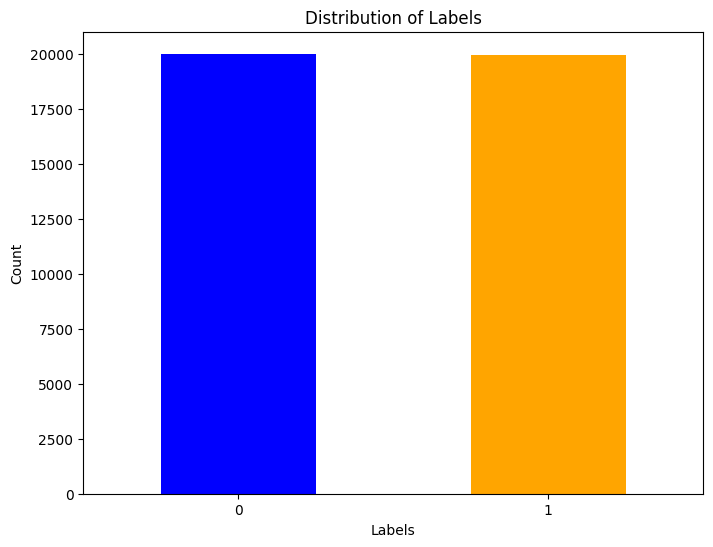

In [48]:
label_counts= data['label'].value_counts()

plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## Tokenize and Pad sequence

In [52]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])
max_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')


In [53]:
labels = data['label'].values

## Split Dataset

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)


## Build the model

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D

# Define the model
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index for padding
embedding_dim = 100  # You can choose different dimensions based on your needs

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print("Model Summary")
print(model.summary())


Model Summary


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_7             │ ?                      │   0 (unbuilt) │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


## Train the model

In [62]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val), verbose=1)

Epoch 1/5


2024-07-18 00:21:26.146491: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 313600000 exceeds 10% of free system memory.
2024-07-18 00:21:27.277187: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 77338800 exceeds 10% of free system memory.


500/500 ━━━━━━━━━━━━━━━━━━━━ 473s 940ms/step - accuracy: 0.4961 - loss: 0.6939 - val_accuracy: 0.5042 - val_loss: 0.6931
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 497s 931ms/step - accuracy: 0.4936 - loss: 0.6934 - val_accuracy: 0.5042 - val_loss: 0.6931
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 498s 924ms/step - accuracy: 0.4975 - loss: 0.6934 - val_accuracy: 0.5042 - val_loss: 0.6931
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 502s 925ms/step - accuracy: 0.4973 - loss: 0.6934 - val_accuracy: 0.4958 - val_loss: 0.6932
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 499s 918ms/step - accuracy: 0.4973 - loss: 0.6933 - val_accuracy: 0.4958 - val_loss: 0.6935


In [65]:
loss, accuracy = model.evaluate(X_val, y_val, verbose=1)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

250/250 ━━━━━━━━━━━━━━━━━━━━ 30s 116ms/step - accuracy: 0.4961 - loss: 0.6935
Validation Accuracy: 49.58%
